### Lasso Regression

In [1]:
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [3]:
import numpy as np

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
batch_size = 50
learning_rate = 0.001

In [5]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)

In [7]:
lasso_param = tf.constant(0.9)

In [13]:
heavyside_step = tf.truediv(1., tf.add(1., tf.exp(tf.multiply(-100., tf.subtract(A, lasso_param)))))  ##truediv does elementwise division
regularization_param = tf.multiply(heavyside_step, 99.)
loss = tf.add(tf.reduce_mean(tf.square(y_target - model_output)), regularization_param)

In [14]:

init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [15]:
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if((i+1)%100 == 0):
        
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ''' + str(temp_loss))

Step #100 A = [[0.82827765]] b = [[1.9363946]]
Loss = [[8.9392605]]
Step #200 A = [[0.82561636]] b = [[2.46728]]
Loss = [[6.035249]]
Step #300 A = [[0.82411087]] b = [[2.8976543]]
Loss = [[4.325011]]
Step #400 A = [[0.8215047]] b = [[3.2541656]]
Loss = [[2.78637]]
Step #500 A = [[0.81986856]] b = [[3.5468788]]
Loss = [[1.6038888]]
Step #600 A = [[0.8191282]] b = [[3.7827127]]
Loss = [[1.6642581]]
Step #700 A = [[0.8159965]] b = [[3.9780993]]
Loss = [[1.0963031]]
Step #800 A = [[0.8151692]] b = [[4.138487]]
Loss = [[0.87211376]]
Step #900 A = [[0.81224424]] b = [[4.2698708]]
Loss = [[0.6113826]]
Step #1000 A = [[0.8103481]] b = [[4.377831]]
Loss = [[0.44299585]]
Step #1100 A = [[0.80807424]] b = [[4.4684315]]
Loss = [[0.36144027]]
Step #1200 A = [[0.80602187]] b = [[4.5411816]]
Loss = [[0.28049135]]
Step #1300 A = [[0.805142]] b = [[4.60143]]
Loss = [[0.47099674]]
Step #1400 A = [[0.80398387]] b = [[4.6504126]]
Loss = [[0.39293122]]
Step #1500 A = [[0.80209726]] b = [[4.6918406]]
Loss =

In [16]:
[slope] = sess.run(A)

In [18]:
[y_intercept] = sess.run(b)

In [19]:
best_fit = []   ###predictions
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

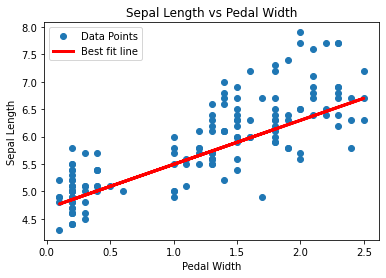

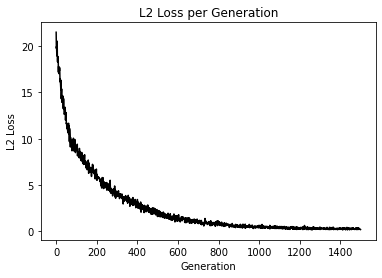

In [22]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()